# Simpson's rule

## Simpson's 1/3 rule
The most basic Simpson's rule is known as Simpson's 1/3 rule (To see steps for the derivation of the following equation, please see {cite:ps}`burden2005numerical`.):

\begin{equation}\label{Simps.equal.eq00}
\int _{a}^{b}f(x)\,dx\approx {\frac {b-a}{6}}\left[f(a)+4f\left({\frac {a+b}{2}}\right)+f(b)\right].
\end{equation}

<iframe src="https://www.geogebra.org/classic/byuskbv9?embed" width="650" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

Introducing the step size $\dfrac {b-a}{6}$, the above equation can be written as follows,
\begin{equation}\label{Simps.equal.eq001}
\int _{a}^{b}f(x)\,dx\approx {\frac {h}{3}}\left[f(a)+4f\left({\frac {a+b}{2}}\right)+f(b)\right].
\end{equation}

<div class="alert alert-block alert-info">
There are a few way to derive Simpson's 1/3 rule. I encourage the students to check \cite{burden2005numerical}, \cite{FeldmanCLP2}, and {cite:ps}`holisticnumericalmethods`.
    
</div>

We can expand on the above rule and use the following 5 points instead,
\begin{equation*}
a=x_{0}<x_{1}<x_{2} <x_{3}<x_{4}=b,
\end{equation*}
Then, it follows from Figure \ref{fig5_14} that,
\begin{align}\int _{a}^{b}f(x)\,dx &\approx
{\frac {h}{3}\left[f(x_{0})+4f\left(x_{1}\right)+f(x_{2})\right]} + {\frac {h}{3}\left[f(x_{2})+4f\left(x_{3}\right)+f(x_{4})\right]},
\notag \\ &
= \frac{h}{3}\left[f(x_{0})+4f\left(x_{1}\right) + 2f(x_{2})+4f\left(x_{3}\right)+f(x_{4})\right]
\end{align}

<iframe src="https://www.geogebra.org/classic/stbevakp?embed" width="650" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

Now, assume that $\{x_{0},x_{1},\ldots, x_{n}\}$ are $n+1$ in $[a,b]$ such that $n$ is an \textbf{even number} ($n+1$) is an odd number) and
\begin{equation*}
a=x_{0}<x_{1}<\cdots <x_{n-1}<x_{n}=b,
\end{equation*}
and $\{x_{0},x_{1},\ldots, x_{n}\}$ are equally distanced with $h = \dfrac{b-a}{n}>0$,
\begin{align}\label{Simps.equal.eq01}
\int _{a}^{b}f(x)\,dx &
\approx \frac {h}{3} \sum _{i=1}^{n/2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
\notag \\ &
={\frac {h}{3}} \left[f(x_{0})+4\sum _{i=1}^{n/2}f(x_{2i-1})+2\sum _{i=1}^{n/2-1}f(x_{2i})+f(x_{n})\right].
\end{align}
The above approximation can be expanded as follows\footnote{the general form of 1/3 Simpson's rule, sometimes, is also known as Composite Simpson's 1/3 rule},
\begin{equation}\label{Simps.equal.eq02}
\int _{a}^{b}f(x)\,dx\approx
{\frac {h}{3}}\left(f(x_{0})+4f(x_{1})+2f(x_{2})+4f(x_{3})+2f(x_{4})+\cdots +4f(x_{n-1})+f(x_{n})\right).
\end{equation}

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np

def Simps(f, a, b, N):
    '''
    Parameters
    ----------
    f : function 
        DESCRIPTION. A function. Here we use lambda functions
    a : float
        DESCRIPTION. a is the left side of interval [a, b]
    b : float
        DESCRIPTION. b is the right side of interval [a, b]
    N : int
        DESCRIPTION. Number of xn points

    Returns
    -------
    S : float
        DESCRIPTION. Numerical Integration of f(x) on [a,b]
        through Simpson's rule

    '''
     
    # discretizing [a,b] into N subintervals
    # N must be an even integer
    
    if N % 2 == 1:
        raise ValueError("N is not an even integer.")
    # the increment h
    h = (b-a)/N
    # discretizing [a,b] into N subintervals
    x = np.linspace(a, b, N+1)
    
    fn = f(x)
    S = (h/3) * np.sum(fn[0:-1:2] + 4*fn[1::2] + fn[2::2])
    return S
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [S] = Simps(f, a, b, N)
%{
Parameters
----------
f : function 
    DESCRIPTION. A function. Here we use lambda functions
a : float
    DESCRIPTION. a is the left side of interval [a, b]
b : float
    DESCRIPTION. b is the right side of interval [a, b]
N : int
    DESCRIPTION. Number of xn points

Returns
-------
S : float
    DESCRIPTION. Numerical Integration of f(x) on [a,b]
    through Simpson's rule
%}

% discretizing [a,b] into N subintervals
x = linspace(a, b, N+1);
% discretizing function f on [a,b]
fn = f(x);
% the increment \delta x
h = (b - a) / N;
% weights
w=ones(1,n);
% odd
w(2:2:(n-1))=4;
% even
w(3:2:(n-1))=2;
S =(h/3)*sum(fn.*w);
```
:::

::::

<font color='Blue'><b>Example</b></font>: Use the Simpson's rule with $n = 10$ and compute ${\displaystyle \int_{0}^{1} x^2\, dx.}

<font color='Green'><b>Solution</b></font>: Discretizing $[0,~1]$ using $h = \dfrac{b-a}{n} = \dfrac{1 - 0}{10} = 0.1$,
\begin{equation*}
\left\{
0,~0.1,~0.2,~0.3,~0.4,~0.5,~0.6,~0.7,~0.8,~0.9,~1.0
\right\}
\end{equation*}
and, we get,
\begin{align*}
\int_{0}^{1} x^2\, dx & \approx \frac {h}{3} \sum _{i=1}^{10/2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
%\notag \\ &
= \frac {0.1}{3} \sum _{i=1}^{5}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
\notag \\ & =
{\frac {0.1}{3}}\left(f(0)+4f(0.1)+2f(0.2)+4f(0.3)+2f(0.4)+\cdots +4f(0.9)+f(1.0)\right)
\notag \\ & =
0.33333333333333337
\end{align*}

<font color='Blue'><b>Example</b></font>:
Use the Simpson's rule with $n = 4$ and compute ${\displaystyle \int_{0}^{1} 2\,{\mathrm{e}}^x\,\cos\left(x\right)\, dx}$. Also, calculate the absolute error using the exact value
\begin{align*}
\int{\mathrm{e}}^x\,\cos\left(x\right)\, dx & = {\mathrm{e}}^x\,\left(\cos\left(x\right)+\sin\left(x\right)\right) + C,\\
\int_{0}^{1} 2\,{\mathrm{e}}^x\,\cos\left(x\right)\, dx & = 2.756049227094728.
\end{align*}

<font color='Green'><b>Solution</b></font>:
Discretizing $[0,~1]$ using $h = \dfrac{b-a}{n} = \dfrac{1 - 0}{4} = 0.25$,
\begin{equation*}
\left\{
0,~0.25,~0.5,~0.75,~1.0
\right\}
\end{equation*}
and, we get,
\begin{align*}
\int_{0}^{1} 2\,{\mathrm{e}}^x\,\cos\left(x\right)\, dx & \approx \frac {h}{3} \sum _{i=1}^{4/2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
%\notag \\ &
= \frac {0.25}{3} \sum _{i=1}^{2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
\notag \\ & =
{\frac {0.25}{3}}\left(f(0)+4f(0.25)+2f(0.5)+4f(0.75)+f(1.0)\right)
= 2.6393667600
\end{align*}
Therefore, the absolute error:
\begin{equation*}
E_{h} = |2.6393667600 - 2.6439173768 | = 0.0046.
\end{equation*}

Loading BokehJS ...

<IPython.core.display.Latex object>

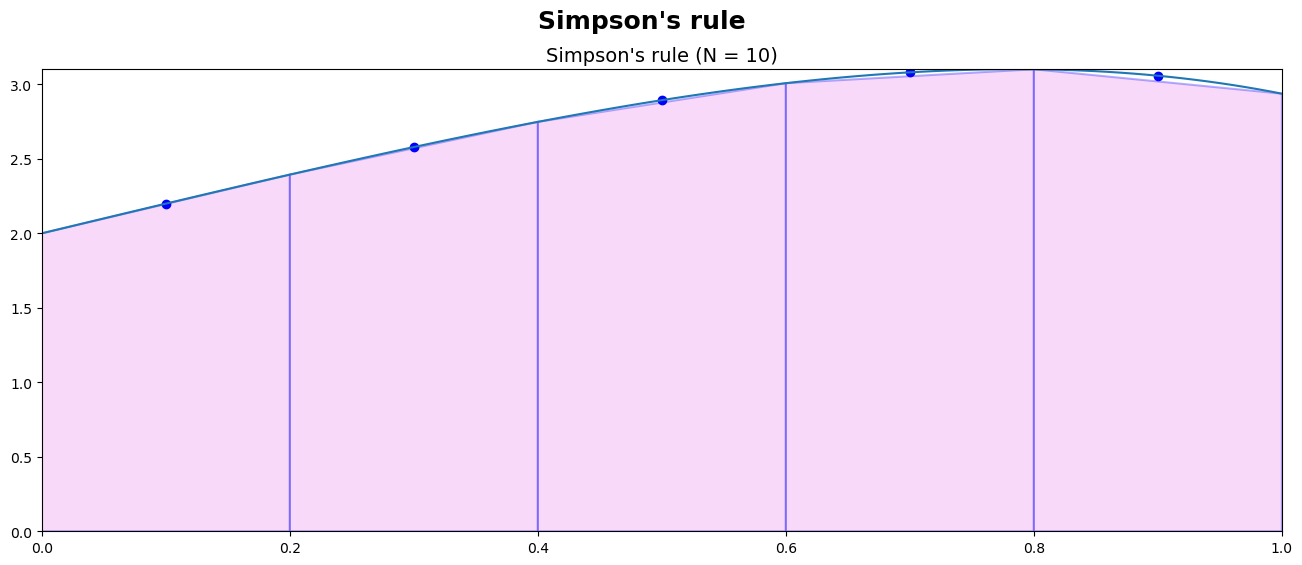

In [1]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

def SimpsPlots(f, a, b, N, ax = False, CL = 'Tomato', EC = 'Blue', Font = False):
    if not ax:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    x = np.linspace(a, b, N+1)
    y = f(x)

    X = np.linspace(a, b, (N**2)+1)
    Y = f(X)
    _ = ax.plot(X,Y)
    for (x1, x2) in zip(x[:N:2], x[2:N+1:2]):
        ax.fill([x1, x1, x2, x2], [0, f(x1), f(x2), 0], facecolor = CL,
                edgecolor= EC,alpha=0.3, hatch='', linewidth=1.5)
        x3 = x1 + (x2-x1)/2
        _ = ax.scatter(x=x3, y = f(x3), color = EC)
    if Font:
        _ = ax.set_title("""Simpson's rule (N = %i)""" % N, fontproperties = Font, fontsize = 14)
    else:    
        _ = ax.set_title("""Simpson's rule (N = %i)""" % N, fontsize = 14)
    _ = ax.set_xlim([min(x),max(x)])
    _ = ax.set_ylim([0,max(y)])
    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import display, Latex
from hd_Numerical_Integration_Algorithms import Simps 

f = lambda x : 2* np.exp(x)* np.cos(x)
a =0
b= 1
N = 10
#
fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(16, 6))
Colors = ['Violet', 'Lime']
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle("""Simpson's rule""", fontproperties=font, fontsize = 18)

SimpsPlots(f= f, a = a, b= b, N = N, ax = ax, CL = Colors[0])
Int_trapz = Simps(f= f, a = a, b= b, N = N)
txt = "\\frac {h}{3} \\sum _{i=1}^{%i}\\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\\right] = %.4e"
display(Latex(txt % (N/2, Int_trapz)))
del Int_trapz

<font color='Blue'><b>Example</b></font>: Use the Simpson's rule and compute ${\displaystyle\int_{0}^{\pi/4} \cos^2(x)\,dx}$ when

* a. $n = 10$
* b. $n = 20$.

<font color='Green'><b>Solution</b></font>:

* a. $n = 10$

\begin{align*}
h = \frac{b- a}{n} \quad \Rightarrow \quad h = \frac{\pi/4 - 0}{10} = \frac{\pi}{40}
\end{align*}
\noindent
Discretizing  $[0,~\pi/4]$ using $h = \dfrac{\pi}{40}$,
\begin{equation*}
\left\{0,~\frac{\pi }{40},~\frac{\pi }{20},~\frac{3\,\pi }{40},~\frac{\pi }{10},~\frac{\pi }{8},~\frac{3\,\pi }{20},~\frac{7\,\pi }{40},~\frac{\pi }{5},~\frac{9\,\pi }{40},~\frac{\pi }{4}\right\}.
\end{equation*}
\noindent
Now, we have,
\begin{align*}
\int_{0}^{\pi/4} \cos^2(x)\, dx & \approx \frac {h}{3} \sum _{i=1}^{10/2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
\notag \\ &
= \frac {\pi/40}{3} \sum _{i=1}^{5}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
\notag \\ & =
\frac {\pi}{120}\left(f(0)+4f(\frac{\pi }{40})+2f(\frac{3\,\pi }{20})+\cdots +4f(\frac{9\,\pi }{40})+f(\frac{\pi }{4})\right)
\notag \\ & =
0.6426999297539492
\end{align*}

* b. $n = 20$.

Similarly, discretizing  $[0,~\pi/4]$ using $h = \dfrac{\pi/4 - 0}{20} = \dfrac{\pi}{80}$,
\begin{equation*}
\left\{
0,~\frac{\pi }{80},~\frac{\pi }{40},~\frac{3\,\pi }{80},
\ldots
,~\frac{9\,\pi }{40},~\frac{19\,\pi }{80},~\frac{\pi }{4}
\right\}
\end{equation*}
and, we get,
\begin{align*}
\int_{0}^{\pi/4} \cos^2(x)\, dx & \approx
\frac {h}{3} \sum _{i=1}^{20/2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
\notag \\ &
= \frac {\pi/80}{3} \sum _{i=1}^{10}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]
\notag \\ & =
\frac {\pi}{240}\left(f(0)+4f(\frac{\pi }{80})+2f(\frac{3\,\pi }{40})+\cdots +4f(\frac{19\,\pi }{80})+f(\frac{\pi }{4})\right)
\notag \\ &
= 0.6426991345853721
\end{align*}

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

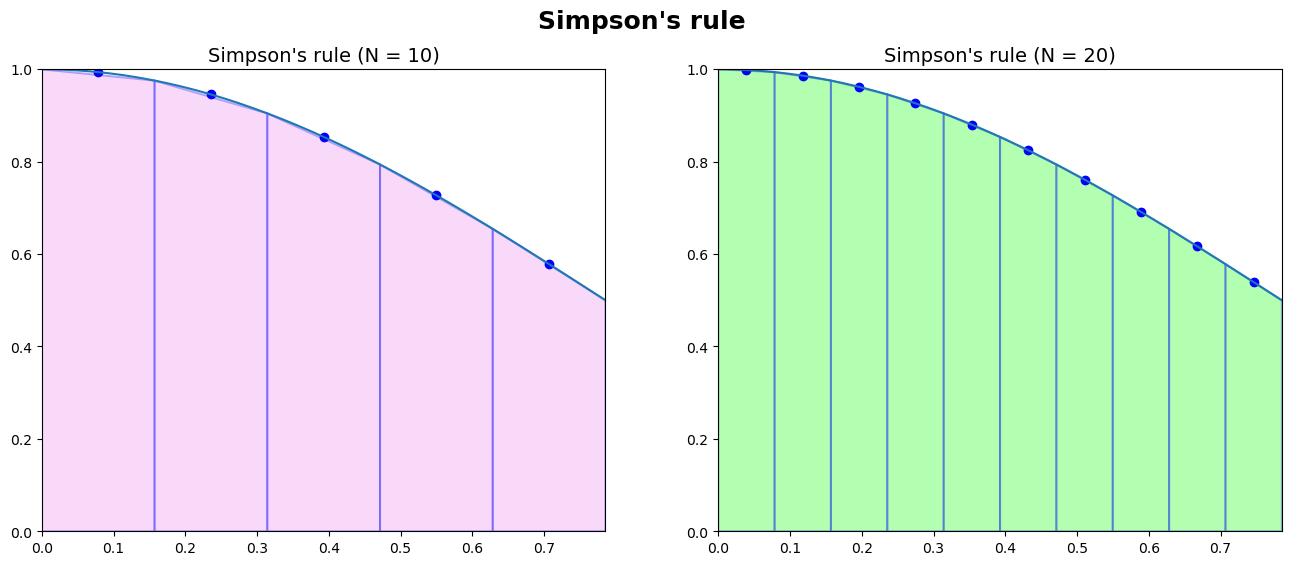

In [2]:
import sys
sys.path.insert(0,'..')
import hd_tools as hd

def SimpsPlots(f, a, b, N, ax = False, CL = 'Tomato', EC = 'Blue', Font = False):
    if not ax:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    x = np.linspace(a, b, N+1)
    y = f(x)

    X = np.linspace(a, b, (N**2)+1)
    Y = f(X)
    _ = ax.plot(X,Y)
    for (x1, x2) in zip(x[:N:2], x[2:N+1:2]):
        ax.fill([x1, x1, x2, x2], [0, f(x1), f(x2), 0], facecolor = CL,
                edgecolor= EC,alpha=0.3, hatch='', linewidth=1.5)
        x3 = x1 + (x2-x1)/2
        _ = ax.scatter(x=x3, y = f(x3), color = EC)
    if Font:
        _ = ax.set_title("""Simpson's rule (N = %i)""" % N, fontproperties = Font, fontsize = 14)
    else:    
        _ = ax.set_title("""Simpson's rule (N = %i)""" % N, fontsize = 14)
    _ = ax.set_xlim([min(x),max(x)])
    _ = ax.set_ylim([0,max(y)])
    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import display, Latex
from hd_Numerical_Integration_Algorithms import Simps 

f = lambda x : np.cos(x)**2
a =0
b= np.pi/4
N = [10, 20]
#
fig, ax = plt.subplots(nrows=1, ncols=len(N), figsize=(16, 6))
ax = ax.ravel()
Colors = ['Violet', 'Lime']
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle("""Simpson's rule""", fontproperties=font, fontsize = 18)
for i in range(len(ax)):
    SimpsPlots(f= f, a = a, b= b, N = N[i], ax = ax[i], CL = Colors[i])
    Int_trapz = Simps(f= f, a = a, b= b, N = N[i])
    txt = "\\frac {h}{3} \\sum _{i=1}^{%i}\\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\\right] = %.4e"
    display(Latex(txt % (N[i]/2, Int_trapz)))
    del Int_trapz
del i

`````{admonition} Proposition

If $f\in C^{4}[a,b]$, the error for the Simpson's 1/3 rule is bounded (in absolute value) by
\begin{equation}\label{Simpson_Error_01}
E_{h} = \left|\int _{a}^{b}f(x)\,dx - \frac {h}{3} \sum _{i=1}^{n/2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right]\right|
 = \frac {(b-a)}{180}h^{4} |f^{(4)}(\xi)|,
\end{equation}
for some $\xi \in [a, b]$. Furthermore, if $|f^{(4)}(x)|\leq L$
\begin{equation}\label{Simpson_Error_02}
E_{h} \leq L\,\frac {(b-a)^5}{180\,n^4} = L\,\frac {(b-a)}{180}h^{4}.
\end{equation}

`````

<font color='Blue'><b>Example</b></font>: Assume that we want to use the Simpson’s 1/3 rule to approximate ${\displaystyle\int_{0}^{2} \frac{1}{1+x}\, dx}$. Find the smallest $n$ for this estimation that produces an absolute error of less than $5 \times 10^{-6}$. Then, evaluate ${\displaystyle\int_{0}^{2} \frac{1}{1+x}\, dx}$ using the Simpson’s 1/3 rule to verify the results.

we know that
\begin{equation*}
\int_{0}^{2} \frac{1}{1+x}\, dx = \ln(x+1) \Big|_{0}^{2} = \ln(3).
\end{equation*}
Also,
\begin{align*}
f(x) = \frac{1}{x+1} & \quad \Rightarrow \quad f'(x) = -\frac{1}{(x + 1)^2} \quad \Rightarrow \quad f''(x) = \frac{2}{(x + 1)^3},\\
& \quad \Rightarrow \quad f^{(3)}(x) = -\frac{6}{{\left(x+1\right)}^4} \quad \Rightarrow \quad f^{(4)}(x) = \frac{24}{{\left(x+1\right)}^5}.
\end{align*}
To find the maximum of $f^{(4)}(x)$ on $[0,2]$, it is clear that $f^{(4)}(x)$ is a decreasing function on $[0,2]$ (why!?). Therefore,
\begin{equation*}
L = \max_{0 \leq x \leq 2}|f^{(4)}(x)| = f^{(4)}(0) = 24.
\end{equation*}
It follows from solving the following the above inequality that
\begin{align*}
L\frac {(b-a)^5}{180\,n^4} < 5 \times 10^{-06} \quad \Rightarrow \quad & (24)\frac {(2-0)^5}{180\,n^4} < 5 \times 10^{-06},\\
\quad \Rightarrow \quad & n^4 > \frac {(24)(32)}{(180)(5 \times 10^{-06})},\\
\quad \Rightarrow \quad & n > \sqrt[4]{\frac {(24)(32)}{(180)(5 \times 10^{-06})}} = 30.393427426063703.
\end{align*}
To test this the above $n$, let $n = 32$ (the smallest \hl{even} integer after 30.393).

In [3]:
import numpy as np
E = 5e-6
f = lambda x : 1/(x+1) # f(x)
f4 =  lambda x : 24/((x + 1)**5); # f''''(x)
Exact = np.log(3) # Exact Int
a =0; b= 2;
x = np.linspace(a, b)
L = max(abs(f4(x)))
N = int(np.ceil(((L*((b-a)**5))/(180* E))**(1/4)))
if N%2 != 0:
    N = N + 1
print('N = %i' % N)
S = Simps(f, a, b, N) # Simpson's Rule
Eh = abs(S - Exact)
print('Eh = %.4e' % Eh)

N = 32
Eh = 4.9770e-07


Thus,
\begin{align*}
\int_{0}^{2} \frac{1}{1+x}\, dx  \approx \frac {h}{3} \sum _{i=1}^{n/2}\left[ f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right] =1.0986127863702684.
\end{align*}
Thus, the absolute error here,
\begin{align*}
E_{h} = 4.97702\times 10^{-07}.
\end{align*}

<font color='Blue'><b>Example</b></font>: <font color='Blue'><b>Example</b></font>: For
\begin{equation*}
\int_{0}^{2} \frac{1}{1 + x}\,dx = \ln(3),
\end{equation*}
use Python/MATLAB show that the order of convergence for the Simpson's rule is indeed 2 numerically!

<font color='Green'><b>Solution</b></font>:
To see the order of convergence of this method

In [4]:
import numpy as np
import pandas as pd
h = [2**(-i) for i in range(3, 10)]

Cols = ['h', 'N', 'Eh']
Table = pd.DataFrame(np.zeros([len(h), len(Cols)], dtype = float), columns=Cols)
Table['h'] = h
Table['N'] = ((b-a)/Table['h']).astype(int)

for i in range(Table.shape[0]):
    Table.loc[i, 'Eh'] = np.abs(Simps(f, a, b, Table['N'][i]) - Exact)
    
display(Table.style.set_properties(subset=['h', 'N'], **{'background-color': 'PaleGreen', 'color': 'Black',
       'border-color': 'DarkGreen'}).format(dict(zip(Table.columns.tolist()[-3:], 3*["{:.4e}"]))))

hd.derivative_ConvergenceOrder(vecs = [Table['Eh'].values], labels = ["""Simpson's rule"""], xlabel = r"$$i$$",
                               ylabel = " E_{h_{i}} / E_{h_{i-1}}",
                               title = """Order of accuracy: Simpson's rule""",
                               legend_orientation = 'horizontal')

,h,N,Eh
0,1.2500e-01,1.6000e+01,7.7540e-06
1,6.2500e-02,3.2000e+01,4.9770e-07
2,3.1250e-02,6.4000e+01,3.1323e-08
3,1.5625e-02,1.2800e+02,1.9611e-09
4,7.8125e-03,2.5600e+02,1.2263e-10
5,3.9062e-03,5.1200e+02,7.6648e-12
6,1.9531e-03,1.0240e+03,4.7895e-13


The following method can be seen as **Newton-Cotes formula** {cite:ps}`quarteroni2010numerical` of order 3!
## Simpson's 3/8 rule

Simpson's 3/8 rule, sometimes known as Simpson's second rule, is another numerical integration approach established by Thomas Simpson. We have:
\begin{align}\label{Simpson38rule_eq01}
\int _{a}^{b}f(x)\,dx &\approx {\frac {3h}{8}}\left[f(a)+3f\left({\frac {2a+b}{3}}\right)+3f\left({\frac {a+2b}{3}}\right)+f(b)\right]
\notag \\&
={\frac {(b-a)}{8}}\left[f(a)+3f\left({\frac {2a+b}{3}}\right)+3f\left({\frac {a+2b}{3}}\right)+f(b)\right],
\end{align}
where $h=\dfrac{b -a}{3}$.

<iframe src="https://www.geogebra.org/classic/fneywruk?embed" width="650" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

Similarly, we can expand the above rule with two zones for an approximation of ${\displaystyle \int _{a}^{b}f(x)\,dx}$ as follows,
\begin{equation*}
a=x_{0}<x_{1}<x_{2} <x_{3}<x_{4}<x_{5}<x_{6}=b,
\end{equation*}
Then, it follows from Figure,
\begin{equation}\label{Simpson38rule_eq02}
\int _{a}^{b}f(x)\,dx \approx {\frac{3h}{8}\left[f(x_{0})+3f\left(x_{1}\right)+3f\left(x_{2}\right)+f(x_{3})\right]}
+
{\frac{3h}{8}\left[f(x_{3})+3f\left(x_{4}\right)+3f\left(x_{5}\right)+f(x_{6})\right]}.
\end{equation}

<iframe src="https://www.geogebra.org/classic/raxy9kdv?embed" width="650" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

Now, assume that $\{x_{0},x_{1},\ldots, x_{n}\}$ are $n+1$ in $[a,b]$ such that $n$ is a multiplications of 3 and
\begin{equation*}
a=x_{0}<x_{1}<\cdots <x_{n-1}<x_{n}=b,
\end{equation*}
and $\{x_{0},~x_{1},\ldots,~x_{n}\}$ are equally distanced with $h = \dfrac{b-a}{n}>0$,
\begin{equation}\label{Simpson38rule_eq03}
\int _{a}^{b}f(x)\,dx \approx \frac {3h}{8}\left[f(x_{0})
+ 3\sum\limits_{\substack{i = 1 \\ i\neq 3k}}^{n-1}f(x_{i})
+2\sum _{j=1}^{n/3-1}f(x_{3j})+f(x_{n})\right]\quad {\text{for  }}k\in \mathbb {N} _{0}.
\end{equation}
The above approximation can be expanded as follows\footnote{the general form of 3/8 Simpson's rule, sometimes, is also known as Composite Simpson's 3/8 rule},
\begin{align}\label{Simpson38rule_eq04}
\int _{a}^{b}f(x)\,dx &\approx {\frac {3h}{8}}{\big [}f(x_{0})+3f(x_{1})+3f(x_{2})+2f(x_{3})+3f(x_{4})+3f(x_{5})+2f(x_{6})
\notag \\& +\cdots +3f(x_{n-2})+3f(x_{n-1})+f(x_{n}){\big ]}.
\end{align}

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np

def Simps38(f, a, b, N):
    '''
    Parameters
    ----------
    f : function 
        DESCRIPTION. A function. Here we use lambda functions
    a : float
        DESCRIPTION. a is the left side of interval [a, b]
    b : float
        DESCRIPTION. b is the right side of interval [a, b]
    N : int
        DESCRIPTION. Number of xn points

    Returns
    -------
    S : float
        DESCRIPTION. Numerical Integration of f(x) on [a,b]
        through Simpson's 3/8 rule

    '''
     
    # discretizing [a,b] into N subintervals
    # N must be an even integer
    
    if N % 3 != 0:
        raise ValueError("N must be a multiplication of 3.")
    # the increment h
    h = (b-a)/N
    # discretizing [a,b] into N subintervals
    x = np.linspace(a, b, N+1)
    # discretizing f(x)
    fn = f(x)
    # weights
    w = np.ones_like(fn);
    w[1:-1:3] = 3;
    w[2:-1:3] = 3;
    w[3:-1:3] = 2;
    S =(3/8)*h*np.sum(fn*w);
    return S
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [S] = Simps38(f, a, b, N)
%{
Parameters
----------
f : function 
    DESCRIPTION. A function. Here we use lambda functions
a : float
    DESCRIPTION. a is the left side of interval [a, b]
b : float
    DESCRIPTION. b is the right side of interval [a, b]
N : int
    DESCRIPTION. Number of xn points

Returns
-------
S : float
    DESCRIPTION. Numerical Integration of f(x) on [a,b]
    through Simpson's 3/8 rule
%}

% discretizing [a,b] into N subintervals
x = linspace(a, b, N+1);
% discretizing function f on [a,b]
fn = f(x);
% the increment \delta x
h = (b - a) / N;
n = N+1;
% weights
w=ones(1,n);
w(2:3:(n-1))=3;
w(3:3:(n-1))=3;
w(4:3:(n-1))=2;
S =(3/8)*h*sum(fn.*w);
```
:::

::::

`````{admonition} Proposition
If $f\in C^{4}[a,b]$, the error for the Simpson's 3/8 rule is bounded (in absolute value) by \cite{esfandiari2017numerical}
\begin{equation}\label{Simpson_Error_01}
E_{h} = \left|\int _{a}^{b}f(x)\,dx -
\frac {3h}{8}\left[f(x_{0})
+ 3\sum\limits_{\substack{i = 1 \\ i\neq 3k}}^{n-1}f(x_{i})
+2\sum _{j=1}^{n/3-1}f(x_{3j})+f(x_{n})\right]
\right|
 = \frac {(b-a)}{80}h^{4} |f^{(4)}(\xi)|,
\end{equation}
for $k\in \mathbb {N} _{0}$ and some $\xi \in [a, b]$. Furthermore, if $|f^{(4)}(x)|\leq L$
\begin{equation}\label{Simpson_Error_02}
E_{h} \leq L\,\frac {(b-a)^5}{80\,n^4} = L\,\frac {(b-a)}{80}h^{4}.
\end{equation}
`````

`````{admonition} Remark
:class: tip
The set of all natural numbers is denoted by $\mathbb{N}$, and the set of natural numbers with zero is denoted by $\mathbb{N}_{0}$.
`````

<font color='Blue'><b>Example</b></font>: Use the Simpson's 3/8 rule with $n = 30$ and compute ${\displaystyle \int_{0}^{1} x^2\, dx.}$

<font color='Green'><b>Solution</b></font>:

Discretizing $[0,~1]$ using $h = \dfrac{b-a}{n} = \dfrac{1 - 0}{30} = \dfrac{1}{30}$,
\begin{equation*}
\left\{
0,~\frac{1}{30},~\frac{1}{15},~\frac{1}{10},~\frac{2}{15},~\frac{1}{6},~\frac{1}{5},~\frac{7}{30},\ldots,~\frac{9}{10},~\frac{14}{15},~\frac{29}{30},~1
\right\}
\end{equation*}
and, we get,
\begin{align*}
\int_{0}^{1} x^2\, dx & \approx
\frac {3h}{8}\left[f(x_{0})+3
\sum\limits_{\substack{i = 1 \\ i\neq 3k}}^{n-1}f(x_{i})+2\sum _{j=1}^{n/3-1}f(x_{3j})+f(x_{n})\right]
,\quad k\in \mathbb{N}_{0}
\notag \\ & =
\left(\frac{3}{8}\right)\left(\frac{1}{30}\right)\left[f(x_{0})+3
\sum\limits_{\substack{i = 1 \\ i\neq 3k}}^{30-1}f(x_{i})+2\sum _{j=1}^{30/3-1}f(x_{3j})+f(x_{n})\right]
,\quad k\in \mathbb{N}_{0}
\notag \\ & =
\left(\frac{3}{8}\right)\left(\frac{1}{30}\right)\left[f\left(\frac{1}{30}\right)+3f\left(\frac{1}{15}\right)+3f\left(\frac{1}{10}\right)+2f\left(\frac{2}{15}\right)+\cdots +3f\left(\frac{29}{30}\right)+f(1.0)\right]
\notag \\ & =
0.33333333333333337
\end{align*}

<font color='Blue'><b>Example</b></font>: For the following integration,
\begin{align*}
\int_{0}^{2} \tanh(x +1) \, dx= -2 - \ln\left(1 + e^2\right) + \ln\left(1 + e^6\right) \approx 1.8755476740947579
\end{align*}
use Python/MATLAB and show that the order of convergence for the Simpson's 3/8 rule is indeed 4 numerically!
<font color='Green'><b>Solution</b></font>

In [6]:
from hd_Numerical_Integration_Algorithms import Simps38 
f = lambda x: np.tanh(x +1)
a = 0; b = 2;
Exact = -2 - np.log(1 + np.exp(2)) + np.log(1 + np.exp(6))
N = [3*(2**i) for i in range(1, 8)]
Simps_list = []
for n in N:
  S = Simps38(f = f, a = a, b = b, N = n)
  Simps_list.append(abs(Exact - S))
Table = pd.DataFrame(data = {'h':[(b-a)/n for n in N], 'N':N, 'Eh': Simps_list})


display(Table.style.set_properties(subset=['h', 'N'], **{'background-color': 'PaleGreen', 'color': 'Black',
       'border-color': 'DarkGreen'}).format(dict(zip(Table.columns.tolist()[-3:], 3*["{:.4e}"]))))

hd.derivative_ConvergenceOrder(vecs = [Table['Eh'].values], labels = ["""Simpson's rule"""], xlabel = r"$$i$$",
                               ylabel = " E_{h_{i}} / E_{h_{i-1}}",
                               title = """Order of accuracy: Simpson's rule""",
                               legend_orientation = 'horizontal')

,h,N,Eh
0,3.3333e-01,6.0000e+00,1.1097e-04
1,1.6667e-01,1.2000e+01,5.9857e-06
2,8.3333e-02,2.4000e+01,3.5699e-07
3,4.1667e-02,4.8000e+01,2.2044e-08
4,2.0833e-02,9.6000e+01,1.3736e-09
5,1.0417e-02,1.9200e+02,8.5786e-11
6,5.2083e-03,3.8400e+02,5.3604e-12
